In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [201]:
data = pd.read_csv("normalised_export.csv", encoding='windows-1251', skiprows=[1])

In [202]:
pd.read_csv("normalised_export.csv", encoding='windows-1251').iloc[0, :]

/tmp/ipython-input-2192645335.py:1: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("normalised_export.csv", encoding='windows-1251').iloc[0, :]


,0
shotn,№
time,ms
R-R_lcfs,mm
T_e/<Te>,1.0
n_e/<ne>,1.0
I_p,kA
B_T,T
Volume,m^3
W_e,kJ
l42,cm


In [203]:
data.head(10)

,shotn,time,R-R_lcfs,T_e/<Te>,n_e/<ne>,I_p,B_T,Volume,W_e,l42,<n>l,elong,before sawtooth #,Upl*Ipl,NBI1,NBI2,<Te>,<ne>,R
0,41504,170.48,-0.188,0.24890,0.5306,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,59.0
1,41504,170.48,-2.188,0.58700,0.6447,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,57.0
2,41504,170.48,-7.088,1.28600,1.1520,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,52.1
3,41504,170.48,-9.488,1.67500,1.4450,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,49.7
4,41504,170.48,-11.788,2.16900,1.7520,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,47.4
5,41504,170.48,-13.888,2.45200,2.0260,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,45.3
6,41504,170.48,-16.088,2.69700,2.2970,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,43.1
7,41504,170.48,-18.188,2.75700,2.3870,394,0.812,0.633,0.845,71.13,0.939,1.846,13,1065.55,0.0,0.0,442.60,1.00,41.0
8,41504,173.52,0.766,0.07025,0.1729,394,0.812,0.635,0.829,71.22,0.905,1.858,13,882.12,0.0,0.0,429.76,0.97,60.1
9,41504,173.52,-0.284,0.17800,0.4020,394,0.812,0.635,0.829,71.22,0.905,1.858,13,882.12,0.0,0.0,429.76,0.97,59.0


Картинка из примера:

In [233]:
d1 = data[(data['shotn'] == 43043) & (data['time'] == 164.23) & (data['R'] > 40)]
d2 = data[(data['shotn'] == 43043) & (data['time'] == 167.26) & (data['R'] > 40)]
xvals = np.linspace(40.4, 59.2, 100)
before_down = np.interp(xvals, d1['R'][::-1], (d1['<Te>'] * d1['T_e/<Te>']*0.95)[::-1])
before_up = np.interp(xvals, d1['R'][::-1], (d1['<Te>'] * d1['T_e/<Te>']*1.05)[::-1])
after_down = np.interp(xvals, d2['R'][::-1], (d2['<Te>'] * d2['T_e/<Te>']*0.95)[::-1])
after_up = np.interp(xvals, d2['R'][::-1], (d2['<Te>'] * d2['T_e/<Te>']*1.05)[::-1])

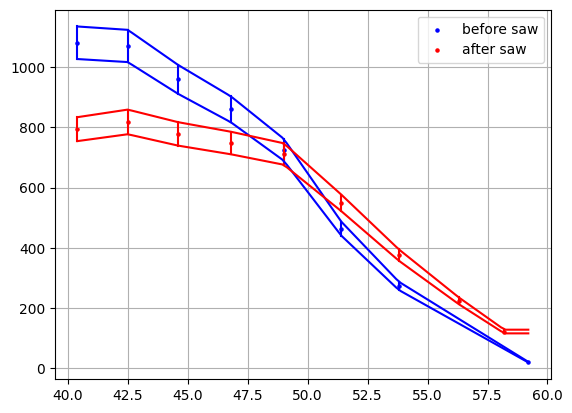

In [234]:
plt.plot([d1['R'], d1['R']], [d1['<Te>'] * d1['T_e/<Te>']*0.95, d1['<Te>'] * d1['T_e/<Te>']*1.05], color='blue')
plt.plot([d2['R'], d2['R']], [d2['<Te>'] * d2['T_e/<Te>']*0.95, d2['<Te>'] * d2['T_e/<Te>']*1.05], color='red')
plt.scatter(d1['R'],d1['<Te>'] * d1['T_e/<Te>'], color='blue', s=5, label='before saw')
plt.scatter(d2['R'], d2['<Te>'] * d2['T_e/<Te>'], color='red', s=5, label='after saw')
plt.plot(xvals, before_down, color='blue')
plt.plot(xvals, before_up, color='blue')
plt.plot(xvals, after_down, color='red')
plt.plot(xvals, after_up, color='red')
plt.grid()
plt.legend(loc='best')

In [251]:
def calc_J(before_down, before_up, after_down, after_up):
  coefs = []
  for bd, bu, ad, au in zip(before_down, before_up, after_down, after_up):
    J = (min(max(bd, bu), max(ad, au)) - max(min(bd, bu), min(ad, au))) / (max(bd, bu, ad, au) - min(bd, bu, ad, au))
    coefs.append(J)
  return coefs

def find_inn_out(x, J):
  center = np.argmax(J)
  inn_d, inn_u = x[center], x[center]
  out_d, out_u = x[center], x[center]
  for i in range(center, len(J)):
    if J[i] > 0:
      out_u = x[i]
    else:
      break
  for i in range(center, len(J)):
    if J[i] > 0.5:
      inn_u = x[i]
    else:
      break
  for i in range(center, 0, -1):
    if J[i] > 0:
      out_d = x[i]
    else:
      break
  for i in range(center, 0, -1):
    if J[i] > 0.5:
      inn_d = x[i]
    else:
      break
  return (inn_d, inn_u), (out_d, out_u)

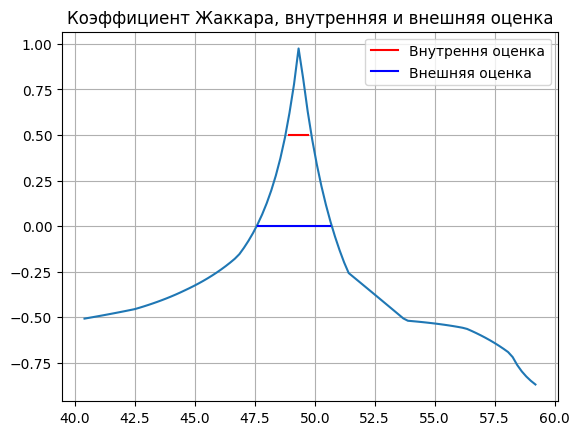

In [262]:
J = calc_J(before_down, before_up, after_down, after_up)
(inn_d, inn_u), (out_d, out_u) = find_inn_out(xvals, J)
plt.plot(xvals, calc_J(before_down, before_up, after_down, after_up))
plt.plot([inn_d, inn_u], [0.5, 0.5], color='red', label='Внутрення оценка')
plt.plot([out_d, out_u], [0, 0], color='blue', label='Внешняя оценка')
plt.grid()
plt.title('Коэффициент Жаккара, внутренняя и внешняя оценка')
plt.legend()

In [174]:
groupped_shots = data.groupby(lambda idx: data.loc[idx, 'shotn'])

In [176]:
BtIp = groupped_shots['B_T'].mean() / groupped_shots['I_p'].mean()

In [266]:
from collections import defaultdict
shots = defaultdict(dict)
for name, group in groupped_shots:
  times = group['time'].unique()
  if len(times) == 1:
    continue
  t1idx = (len(times) - 1) // 2
  t1 = times[t1idx]
  t2 = times[t1idx + 1]
  shots[name]['R_before'] = np.array(group[group['time'] == t1]['R'])
  shots[name]['R_after'] = np.array(group[group['time'] == t2]['R'])
  shots[name]['Te_before'] = np.array(group[group['time'] == t1]['<Te>'] * group[group['time'] == t1]['T_e/<Te>'])
  shots[name]['Te_after'] = np.array(group[group['time'] == t2  ]['<Te>'] * group[group['time'] == t2]['T_e/<Te>'])
  shots[name]['BT/Ip'] = group['B_T'].mean() / group['I_p'].mean()

In [290]:
for shotn, info in shots.items():
  x1 = min(info['R_before'].min(), info['R_after'][-1].min())
  x2 = max(info['R_before'].max(), info['R_after'][-1].max())
  xvals = np.linspace(x1, x2, 200)
  before_down = np.interp(xvals, info['R_before'][::-1], (info['Te_before']*0.95)[::-1])
  before_up = np.interp(xvals, info['R_before'][::-1], (info['Te_before']*1.05)[::-1])
  after_down = np.interp(xvals, info['R_after'][::-1], (info['Te_after']*0.95)[::-1])
  after_up = np.interp(xvals, info['R_after'][::-1], (info['Te_after']*1.05)[::-1])
  J = calc_J(before_down, before_up, after_down, after_up)
  (inn_d, inn_u), (out_d, out_u) = find_inn_out(xvals, J)
  shots[shotn]['inn'] = (inn_d, inn_u)
  shots[shotn]['out'] = (out_d, out_u)
  assert inn_d >= out_d
  assert inn_u <= out_u
  assert inn_d <= inn_u
  assert out_d <= out_u

In [336]:
inn_mids = []
xs = []
clean_shots = defaultdict(dict)
for name, shot in shots.items():
  if shot['BT/Ip'] > 0.004:
    continue
  if shot['inn'][1] - shot['inn'][0] > 1:
    continue
  if shot['out'][1] - shot['out'][0] > 5:
    continue
  clean_shots[name] = shot
  clean_shots[name]['inn_mid'] = (shot['inn'][1] - shot['inn'][0]) * 0.5
  inn_mids.append((shot['inn'][1] + shot['inn'][0]) * 0.5)
  xs.append(shot['BT/Ip'])

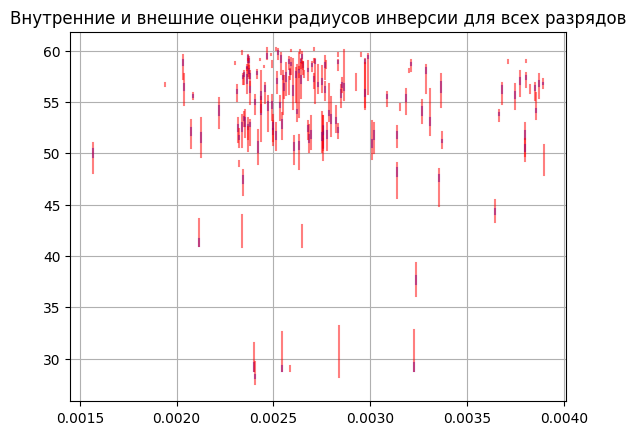

In [337]:
for name, shot in clean_shots.items():
  plt.plot([shot['BT/Ip'], shot['BT/Ip']], [shot['inn'][0], shot['inn'][1]], color='blue', alpha=0.5, label='inn')
  plt.plot([shot['BT/Ip'], shot['BT/Ip']], [shot['out'][0], shot['out'][1]], color='red', alpha=0.5, label='out')
plt.grid()
plt.title('Внутренние и внешние оценки радиусов инверсии для всех разрядов');

In [362]:
linreg_res = scipy.stats.linregress(xs, inn_mids)

In [359]:
def build_coridor(shots):
  inns, outs = [], []
  for name, shot in shots.items():
    xs.append(shot['BT/Ip'])
    inns.append(shot['inn'])
  lines = []
  for i in range(len(inns)):
    for j in len(i+1, range(len(inns))):
      p1x, p2x = xs[i], xs[i]
      p1y, p2y = inns[i]
      p3x, p3x = xs[j], xs[j]
      p4y, p4y = inns[j]
      k1 = (p4y - p2y) / (p4x - p2x)
      b1 = p4y - k1*p4x
      k2 = (p4y - p1y) / (p4x - p1x)
      b2 = p4y - k2*p4x
      k3 = (p3y - p2y) / (p3x - p2x)
      b3 = p3y - k3*p3x
      k4 = (p3y - p1y) / (p3x - p1x)
      b4 = p3y - k4*p3x
      lines.append(filter_coefs(k1, b1, k2, b2, k3, b3, k4, b4))
    return lines

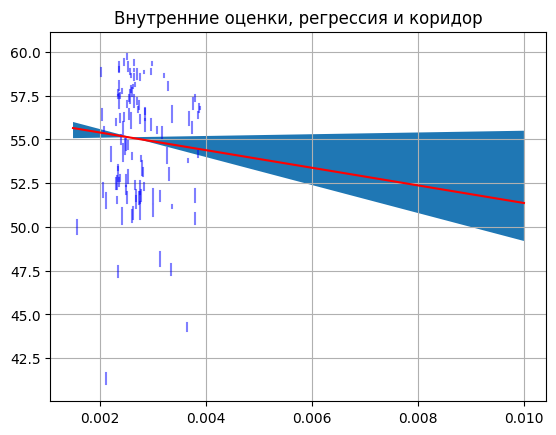

In [387]:
for name, shot in clean_shots.items():
  if shot['inn'][0] < 41:
    continue
  plt.plot([shot['BT/Ip'], shot['BT/Ip']], [shot['inn'][0], shot['inn'][1]], color='blue', alpha=0.5, label='inn')
xvals = np.linspace(0.0015, 0.01, 200)
plt.plot(xvals, linreg_res.intercept + linreg_res.slope * xvals, color='red')
plot_coridor(build_coridor(clean_shots))
plt.grid()
plt.title('Внутренние оценки, регрессия и коридор');